# Multi-Class Classification

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import fashion_mnist

# The Data is already been sorted to Train and Test Data for us

(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
train_X.shape

(60000, 28, 28)

In [5]:
train_X[0].shape

(28, 28)

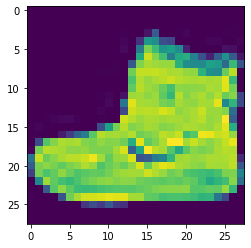

In [6]:
plt.imshow(train_X[0])

In [7]:
train_y.shape, train_y[0]

((60000,), 9)

In [8]:
train_y.min(), train_y.max()

(0, 9)

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## **Changes**
* **Input Shape :** (28 x 28)

* **Output Shape :** 10 (10 differesent classes)

* **Loss function :** CatgoricalCrosstentropy() for OneHot Encoded else use sparse

* **Output Layer Activation :** Softmax

Also add a Input Flatten layer

In [10]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs = 10)



Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 2.8252 - accuracy: 0.1333
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7468 - accuracy: 0.2245
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6444 - accuracy: 0.2829
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6078 - accuracy: 0.2917
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5992 - accuracy: 0.2978
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5906 - accuracy: 0.3060
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5735 - accuracy: 0.3190
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5812 - accuracy: 0.3122
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5753 - accuracy: 0.3225
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.571

In [11]:
train_X = train_X / 255.0
test_X = test_X / 255.0


In [12]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model.fit(train_X,
                         train_y,
                         epochs=10,
                         validation_data=(test_X, test_y))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7706 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5984 - accuracy: 0.7902 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7986 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5611 - accuracy: 0.8017 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5562 - accuracy: 0.8030 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5458 - accuracy: 0.8076 - val_loss: 0.6097 - val_accuracy:

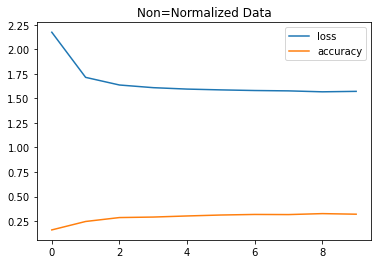

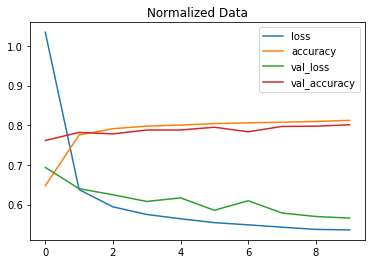

In [13]:
pd.DataFrame(history.history).plot(title="Non=Normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized Data");

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_X,
                               train_y,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_X, test_y),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4476 - accuracy: 0.5004 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6479 - accuracy: 0.7707 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5978 - accuracy: 0.7901 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5768 - accuracy: 0.7978 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5630 - accuracy: 0.7995 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5577 - accuracy: 0.8003 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5506 - accuracy: 0.8043 - val_loss: 0.5898 - val_accuracy:

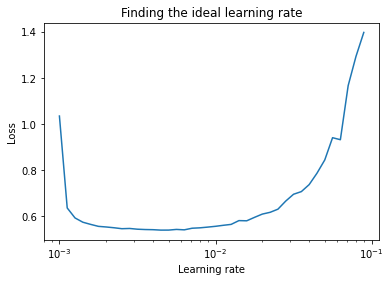

In [34]:
plt.semilogx(find_lr_history.history["lr"], find_lr_history.history["loss"]); # want the x-axis to be log-scale

plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [44]:
y_preds = (model.predict(test_X))
y_preds = y_preds.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 3, 1, 5])

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, y_preds)

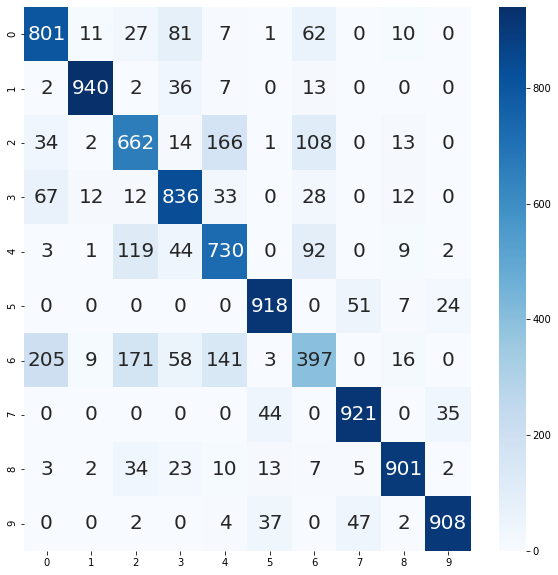

In [56]:
import seaborn as sn
plt.figure(figsize = (10, 10))
sn.heatmap(cm, annot=cm, fmt="", annot_kws={"size": 20}, cmap='Blues');


In [57]:
 import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

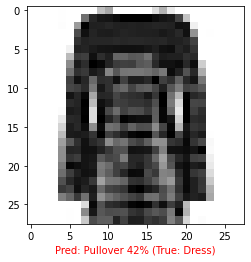

In [72]:
# Check out a random image as well as its prediction
plot_random_image(model=model, 
                  images=test_X, 
                  true_labels=test_y, 
                  classes=class_names)